<a href="https://colab.research.google.com/github/Rachit304/Machine-Leaning/blob/main/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
import seaborn as sns;sns.set()

In [ ]:
df = pd.read_csv('Movie_classification.csv')
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df.shape

(506, 19)

In [ ]:
df = df.head(50)

In [ ]:
df.shape

(50, 19)

In [ ]:
df = df.drop(['Time_taken'], axis=1)

In [ ]:
df['Profit'] = df['Collection'] - df['Budget']
df['Result'] = df.apply(lambda x: 1 if x['Profit'] <= 10000 else 0, axis=1)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,Profit,Result
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,223.840,Thriller,23,494,48000,1,11475.875,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,243.456,Drama,42,462,43200,0,7531.345,1
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,2022.400,Comedy,38,458,69400,1,29487.325,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,225.344,Drama,45,472,66800,1,27926.110,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,225.792,Drama,55,395,72400,1,32698.415,0


In [ ]:
inputs =df[['Budget','Collection','Genre']]
target = df['Result']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_genre = LabelEncoder()

inputs['Genre_n'] = le_genre.fit_transform(inputs['Genre'])
inputs = inputs.drop(['Genre'],axis = 1)
inputs.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Budget,Collection,Genre_n
0,36524.125,48000,3
1,35668.655,43200,2
2,39912.675,69400,1
3,38873.890,66800,2
4,39701.585,72400,2


In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, random_state = 42, test_size =0.2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40, 3), (10, 3), (40,), (10,))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,Y_train)

MLPClassifier(random_state=42)

In [ ]:
mlp.coefs_

[array([[-4.22952766e-02,  2.21561939e-01,  1.21163844e-01,
          5.15957879e-02, -1.70386900e-01, -1.41326100e-01,
         -1.87431996e-01,  1.72570045e-01,  3.22053162e-02,
          7.85951690e-02, -2.05196189e-01,  2.34310211e-01,
          1.64481253e-01, -1.35525507e-01, -1.29256066e-01,
         -1.57827185e-01, -9.88056682e-02,  5.24533905e-03,
         -2.89908423e-02, -7.89105870e-02,  5.79498976e-02,
         -1.70282068e-01, -7.84970677e-02, -4.57679194e-02,
         -1.09474976e-02,  1.41003960e-01, -1.49651848e-01,
          1.08630983e-02,  2.87097917e-02, -1.92937906e-01,
          4.30057501e-02, -1.34530613e-01, -1.84136439e-01,
          2.12479993e-01,  2.20562735e-01,  1.52776188e-01,
         -7.28834859e-02, -1.68734088e-01,  9.53841959e-02,
         -3.30919978e-02, -1.86650597e-01, -7.71417846e-04,
         -1.98651585e-01,  1.93174869e-01, -9.36704311e-02,
          5.82843462e-02, -9.58222921e-02,  1.36183374e-02,
          1.18564636e-02, -1.27843816e-0

In [ ]:
mlp.intercepts_

[array([-0.21640807,  0.01959473,  0.02886325,  0.07077367,  0.10433566,
         0.22969893,  0.00786835, -0.0901071 ,  0.14248956, -0.11062175,
        -0.02945915, -0.19583228, -0.22464872,  0.22712382,  0.16218123,
         0.0891495 , -0.04871834, -0.15770436, -0.16151793, -0.12056045,
         0.02818216,  0.10779349,  0.077329  , -0.10622828,  0.21956838,
         0.11865235,  0.02109508,  0.05838289, -0.03880992, -0.12177297,
        -0.07841722,  0.1244651 , -0.2344075 , -0.1899861 , -0.2238112 ,
        -0.21732086,  0.17158466,  0.09830785, -0.0058302 , -0.1987918 ,
        -0.0087109 , -0.01280546, -0.15774898, -0.03679077, -0.04899286,
         0.05592209,  0.05760464, -0.21509293, -0.06052584,  0.06075394,
         0.00592765,  0.18047882,  0.06742219, -0.15824417, -0.21196058,
         0.05967204, -0.2285581 ,  0.03828665,  0.21250389,  0.03175968,
        -0.05398158,  0.0612003 , -0.01575592,  0.02201972,  0.21309983,
        -0.0598865 ,  0.22262166,  0.20142287, -0.1

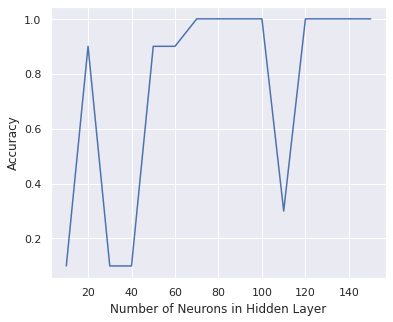

In [ ]:
neu_num =[]
neu_score = []
for i in range(10,151,10):
  mlp = MLPClassifier(hidden_layer_sizes=(i,),random_state=42)
  mlp.fit(X_train,Y_train)
  neu_score.append(mlp.score(X_test,Y_test))
  neu_num.append(i)


plt.figure(figsize=(6,5))
plt.plot(neu_num,neu_score)
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
print("Weight of All Neural Connections:\n")
mlp.coefs_

Weight of All Neural Connections:



[array([[-5.84391922e-02,  1.65695183e-01,  4.92887387e-02,
          3.04194075e-02, -1.44953400e-01, -8.84739393e-02,
         -1.24550202e-01,  1.35874718e-01,  1.11817980e-02,
          9.04492436e-02, -1.38619549e-01,  1.94310966e-01,
          1.39517544e-01, -6.83695866e-02, -7.91795105e-02,
         -1.19844827e-01, -3.75006204e-02,  2.75554929e-04,
         -4.77222841e-03, -4.16617345e-02,  3.55452108e-02,
         -9.44689868e-02, -4.13661339e-02, -1.92108447e-02,
         -9.63452709e-03,  1.00316178e-01, -9.92198812e-02,
         -2.62724728e-05,  2.79340357e-02, -1.28902995e-01,
          1.26536840e-02, -8.32312483e-02, -1.73035202e-01,
          1.84209970e-01,  1.72878948e-01,  1.11705957e-01,
         -7.11249037e-02, -1.09830293e-01,  6.41213213e-02,
         -3.53896125e-03, -1.00853614e-01, -1.09037045e-02,
         -1.80797589e-01,  1.53121219e-01, -5.23807657e-02,
          7.93909997e-02, -6.70761355e-02,  1.59545746e-02,
          2.66802012e-02, -1.29839492e-0

In [ ]:
mlp.intercepts_

[array([ 0.10029064,  0.01009263, -0.03001256,  0.15156254, -0.16343567,
        -0.00292089, -0.1935328 , -0.02226774, -0.17573009, -0.14217692,
        -0.15148218,  0.06804351,  0.10606115,  0.03301895,  0.18304761,
        -0.04319986, -0.08487066,  0.14598701, -0.10947236,  0.18346346,
        -0.20269409,  0.18609975, -0.18093564,  0.15491576,  0.01949201,
         0.18260022, -0.15355161,  0.02132947,  0.17647573,  0.00914811,
         0.0512495 ,  0.07752803, -0.01821   ,  0.05775076,  0.02152931,
         0.1478217 , -0.1729967 , -0.0867515 ,  0.16882829,  0.15456749,
        -0.01756254,  0.03787131, -0.08544565, -0.13322575, -0.01437757,
        -0.04282282,  0.0413822 , -0.15848286,  0.19681547,  0.1875702 ,
         0.06907286,  0.01429629, -0.06121149,  0.13316739,  0.06260494,
        -0.14683566,  0.16275142,  0.12774378,  0.17814731,  0.08939825,
         0.04491911, -0.03641743,  0.17988286,  0.1449829 , -0.18225731,
        -0.18758663, -0.0489278 ,  0.11353839,  0.1

In [ ]:
max(neu_score)

1.0

In [ ]:
neu_num[13]

140

In [ ]:
neu_score[13]

1.0